1. The "Pre-lecture" video (above) mentioned the "standard error of the mean" as being the "standard deviation" of the distribution bootstrapped means. What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture? Explain this concisely in your own words.

Standard deviation is a measure of dispersion, and for the original dataset, it can calculate how "spread out" the data is in relation to the mean. 

Contrastingly, "the standard error of the mean", is the standard deviation of the sample means, across different samples, from the same population of the original data. Essentially, it is an indication of how the sample means from multiple distinct samples vary, when repeated samples are taken from the same population over and over again. 
The standard error of the mean provides us with how precise or how good of an estimation the sample mean is in terms of the population mean. 

In summary, the Standard Deviation is used for calculating the variability of data in relation to the mean, whereas the Standard Error of the Mean measures the precision of using the sample mean as an estimation of the population mean, without actually having to repeat an experiment numerous times. 

2. The "Pre-lecture" video (above) suggested that the "standard error of the mean" could be used to create a confidence interval, but didn't describe exactly how to do this. How can we use the "standard error of the mean" to create a 95% confidence interval which "covers 95% of the bootstrapped sample means"? Explain this concisely in your own words

In order to create a 95% confidence interval using the standard error of the mean, we can add and subtract 1.96 times the standard error of the mean from the sample mean, in order to find the lower and upper boundaries respectively. This will subsequently give us an interval that covers 95% of the bootstrapped sample means, (the area between these two boundaries), which provides us with a range in which we are 95% confident that (in this instance) the population mean lies within this given interval. 

3. Creating the "sample mean plus and minus about 2 times the standard error" confidence interval addressed in the previous problem should indeed cover approximately 95% of the bootstrapped sample means. Alternatively, how do we create a 95% bootstrapped confidence interval using the bootstrapped means (without using their standard deviation to estimate the standard error of the mean)? Explain this concisely in your own words.

In order to create a 95% bootstrapped confidence interval using the bootstrapped means, we can repeat the sampling with replacement method from the original data for the purpose of obtaining multiple bootstrapped sample means. Then, we can sort these bootstrapped sample means in order of ascension, so as to acquire the 2.5th and 97.5th percentiles, (the lower and upper boundaries of a 95% confidence interval), which will provide us with an interval where we are 95% confident that the population mean will fall, which essentially provides us with an estimate of where the population mean is likely to be. 

4. The "Pre-lecture" video (above) mentioned that bootstrap confidence intervals could apply to other statistics of the sample, such as the "median". Work with a ChatBot to create code to produce a 95% bootstrap confidence interval for a population mean based on a sample that you have and comment the code to demonstrate how the code can be changed to produce a 95% bootstrap confidence interval for different population parameter (other than the population mean, such as the population median).

In [1]:
import numpy as np

# Generate a sample dataset (replace this with your actual data)
np.random.seed(42)  # Set seed for reproducibility
sample = np.random.normal(loc=50, scale=10, size=100)  # Example data

# Number of bootstrap samples to generate
num_bootstrap_samples = 1000

# Function to calculate a bootstrap confidence interval
def bootstrap_confidence_interval(data, num_samples, statistic_func, alpha=0.05):
    # Generate bootstrap samples and compute the statistic for each sample
    bootstrap_statistics = np.array([
        statistic_func(np.random.choice(data, size=len(data), replace=True))
        for _ in range(num_samples)
    ])
    
    # Calculate the lower and upper percentiles of the bootstrap distribution
    lower_bound = np.percentile(bootstrap_statistics, 100 * (alpha / 2))
    upper_bound = np.percentile(bootstrap_statistics, 100 * (1 - alpha / 2))
    
    return lower_bound, upper_bound

# Calculate a 95% confidence interval for the population mean
ci_mean = bootstrap_confidence_interval(sample, num_bootstrap_samples, np.mean)

print(f"95% Bootstrap Confidence Interval for the Mean: {ci_mean}")

# To calculate a 95% confidence interval for the population median, change `np.mean` to `np.median`
ci_median = bootstrap_confidence_interval(sample, num_bootstrap_samples, np.median)

print(f"95% Bootstrap Confidence Interval for the Median: {ci_median}")

# The above code can be used to generate other statistical data, such as the population median,
# by using different functions 


95% Bootstrap Confidence Interval for the Mean: (47.276635751407504, 50.62851486440195)
95% Bootstrap Confidence Interval for the Median: (46.98896304410711, 51.10922589709866)


The above code can be used to generate other population parameter C.I's, such as the population median, by utilizing its respective function within the bootstrap resampling, such as np.median. The same can be applied for other statistical data, like variance and standard deviation by using their respective funcitons as well, such as np.var, and np.std 

Summary (For Question 4): In this chat session, we explored how to create a 95% bootstrap confidence interval for a population mean using Python. The code provided demonstrates generating a sample dataset, creating bootstrap samples, and computing the confidence interval by calculating the specified statistic (mean) across all bootstrap samples. The function bootstrap_confidence_interval was introduced to handle the process of resampling and calculating the bounds of the interval. Additionally, instructions were provided on how to modify the code to calculate confidence intervals for other population parameters, such as the median, variance, or standard deviation, by changing the statistic function (e.g., replacing np.mean with np.median or other relevant functions). The overall process emphasizes flexibility in using bootstrap resampling for a variety of statistical estimations.

ChatGPT log: https://chatgpt.com/share/66fe048f-dc64-800c-baaf-2892ac48d185

5. The previous question addresses making a confidence interval for a population parameter based on a sample statistic. Why do we need to distinguish between the role of the popualation parameter and the sample statistic when it comes to confidence intervals? Explain this concisely in your own words.

The need to distinguish between the role of the population parameter and sample statistic when it comes to C.I's is important, because we first need to establish the sample statistic, which we can collect from the sample data. Afterwards, this will allow us to construct the confidence interval of our choice, (in this instance, 95%), as a means to obtain a range of possible values for the population parameter that is not yet known. 

Essentially, the sample statistic os obtained through the sample data, and is used to create the confidence interval, where we can then find the interval in which the population parameter lies. 

6. Provide written answers explaining the answers to the following questions in an informal manner of a conversation with a friend with little experience with statistics.

1). What is the process of bootstrapping?

2). What is the main purpose of bootstrapping?

3). If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

1). Bootstrapping is the process of taking data from a dataset, and sampling it (with replacement) to create a new one (with the same amount values as the original). This allows for the creation of multiple new data samples called "bootstrap samples" from the same original data. This will allow us to calculate and compute statistical summaries, such as mean and median, just as if we had taken a lot of samples from a population. 

To a Friend: So bootstrapping is where we take data from a dataset, and in order to learn more about this data, we can take what we already have (the original data), and create multiple samples from this original data. We can randomly take data from the dataset, and use the same data points more than once, but it must be the same amount that we had in the original dataset. So if we have 10 data points from the original data, we use 10 randomly chosen data points from this dataset (with replacement allowed) to create a "bootstrap dataset". Once we have done this repeatedly, we can derive different statistical summaries from this "bootstrapped dataset", such as mean and median, which will give us close estimates just as if we had performed the process of sampling the data over and over again authentically. 


2). The main purpose of bootstrapping is to replicate the process of sampling from the data over and over againn, in order to analyze the data and derive statistical summaries of said data, without the worry of loss of time and resources that would have been spent otherwise. It also allows for the construction of hypothesis tests and confidence intervals, that would give us a clear and concise implication to where the data falls within the range of the population mean, median, or any other statistics that is of interest. It aslo serves as a purpose to understand how statistics work when you only have a limited sample from a large population of data. 

To a Friend: So the purpose of bootstrapping is to essentially replicate the process of sampling from the same dataset over and over again, in order to analyze this data and create statistical summaries of said data, without the worry of losing the time and resources that it would have taken to authentically repeat the process of sampling data otherwise. Bootstrapping also allows for the construction of what is called "Confidence Intervals" and "Hypothesis Testing", which in simple terms, gives us a "range" for where data is located for any statistic of interest, such as population mean or median. It also serves as a purpose to understand how statistics work when you only have a limited sample from a large population of data.

3). Bootstrapping could be used to assess whether or not my (hypothesized) guess might be plausible, by:

Creating bootstrap samples, caluclating the average of each of these samples (the mean), building a distribution from these samples (such as a histogram), and then comparing my hypothesis to this distribution. Depending on whether or not my hypothesized value falls within the range of the C.I of my bootstrap distribution, will determine whether I can assess if my (hypothesized) guess will be plausible or not. 

To a Friend: So as mentioned previously, with the creation of these "Confidence Intervals" and using "Hypothesis Testing", we can determine whether or not my hypothesized guess is plausible or not. This is done by creating bootstrap samples, calculating the averages of these samples (the mean), building what we can a distribution from these samples, (a distribution of the data), and then comparing my hypothesized guess to this distribution that I have. If my hypothesized values fall within the range of the C.I of my bootstrap distribution, then I can assess if my guess is feasible or not.  

7. The "Pre-lecture" video (above) introduced hypothesis testing by saying that "the confidence interval covers zero, so we cannot reject the hypothesis that the drug is [on average] not doing anything". This conclusion could be referred to as "failing to reject the null hypothesis", where the term "null" refers to the concept of "no effect [on average]". Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero? Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"? Explain the answers to these questions concisely in your own words.

Confidence Intervals can represent the range of values that we can deem as feasible for a given population parameter, based on the sample data that was used to construct these C.I's. If the C.I were to overlap zero, that essentially means that zero is a feasible value for the population that is being studied. This means that there is not enough evidence for us to form a proper conclusion. Therefore, wefail to reject the null hypothesis, which states that taking the drug would have no effect (on average).
Basically, even though the sample mean itself is not zero, as long as the C.I includes zero, we cannot form a proper conclusion (meaning that we dont not know whether or not a significant effect occurs), and must accept the null hypothesis based on the information given to us. 


The opposite conclusion to this would be reject the null hypothesis, where taking the drug would have an effect (on average). This is where zero would not have occurred in the C.I, meaning that all the other feasible values for zero would have been significantly different from zero, meaning that we can come to the conslusion that the drug did have a significant effect. 

8. Complete the following assignment.

Vaccine Data Analysis Assignment
Overview

The company AliTech has created a new vaccine that aims to improve the health of the people who take it. Your job is to use what you have learned in the course to give evidence for whether or not the vaccine is effective.

Data AliTech has released the following data.

csv
PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
1,45,M,84,86
2,34,F,78,86
3,29,M,83,80
4,52,F,81,86
5,37,M,81,84
6,41,F,80,86
7,33,M,79,86
8,48,F,85,82
9,26,M,76,83
10,39,F,83,84

Deliverables - While you can choose how to approach this project, the most obvious path would be to use bootstrapping, follow the analysis presented in the "Pre-lecture" HW video (above). Nonetheless, we are primarily interested in evaluating your report relative to the following deliverables.

- A visual presentation giving some initial insight into the comparison of interest.
- A quantitative analysis of the data and an explanation of the method and purpose of this method.
- A conclusion regarding a null hypothesis of "no effect" after analyzing the data with your methodology.
- The clarity of your documentation, code, and written report. 

Consider organizing your report within the following outline template.

Problem Introduction

- An explaination of the meaning of a Null Hypothesis of "no effect" in this context
- Data Visualization (motivating and illustrating the comparison of interest)

Quantitative Analysis

- Methodology Code and Explanations
- Supporting Visualizations

Findings and Discussion
- Conclusion regarding a Null Hypothesis of "no effect"
- Further Considerations

Problem Introduction: 

Null Hypothesis Explanation: 
The meaning of the null hypothesis, H0 (in this context), will be the assumption that the vaccine has had "no effect" on the health of the people that took it. This suggests that health scores after taking the vaccine are due to other external factors, rather than the vaccine itself. 

Data Visualizations (seen below, provided by ChatGPT):

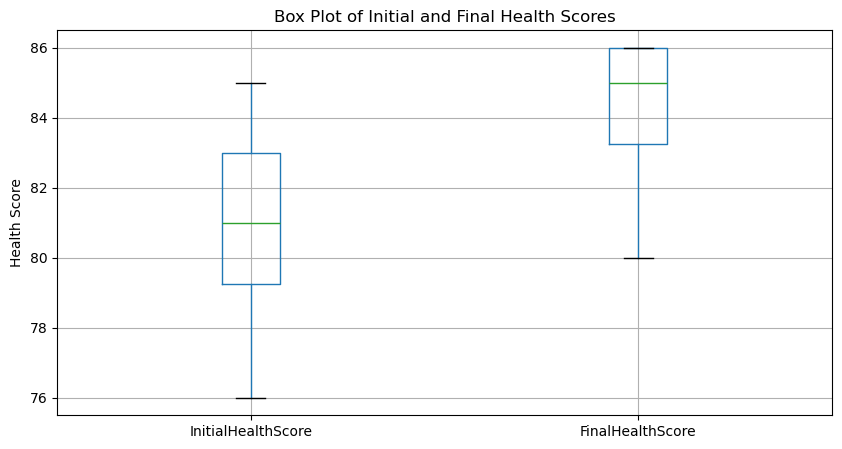

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating the data for visualization
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Box plot for Initial and Final Health Scores
plt.figure(figsize=(10, 5))
df[['InitialHealthScore', 'FinalHealthScore']].boxplot()
plt.title('Box Plot of Initial and Final Health Scores')
plt.ylabel('Health Score')
plt.show()



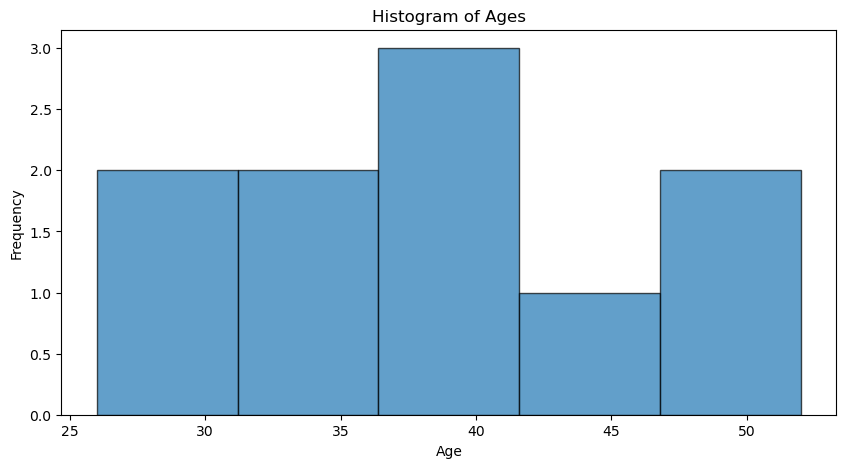

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating the data for visualization
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Histogram of Ages
plt.figure(figsize=(10, 5))
plt.hist(df['Age'], bins=5, alpha=0.7, edgecolor='black')
plt.title('Histogram of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


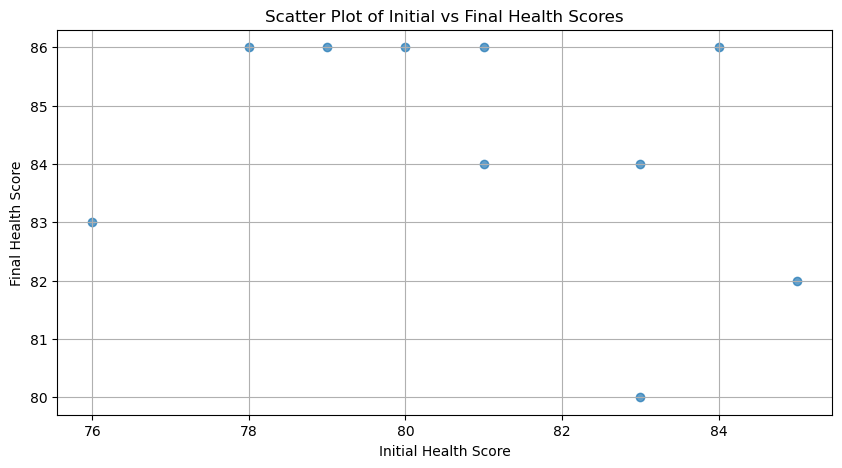

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating the data for visualization
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Scatter plot of Initial vs Final Health Scores
plt.figure(figsize=(10, 5))
plt.scatter(df['InitialHealthScore'], df['FinalHealthScore'], alpha=0.7)
plt.title('Scatter Plot of Initial vs Final Health Scores')
plt.xlabel('Initial Health Score')
plt.ylabel('Final Health Score')
plt.grid(True)
plt.show()


Qualitative Analysis: 

Methodology: 

The process of bootstrapping will be used here in order to assess/determine whether or not the vaccine has had no effect on the health of the people that took it (the null hypothesis H0), or has had an effect on the people that took it (the alternative hypothesis H1). Bootstrapping will allow us to construct confidence intervals of the bootstrapped distribution, which will allow us to subsequently use hypothesis testing in order to assess out hypotheses. 

So essentially, we will:
- Calculate the differences that we observed between the intial health scores and final scores. 
- Create bootstrap samples (which is samling data with replacement) of this data from the dataset. 
- Calculate the difference in averages among each bootstrap sample.
- Construct C.I's (95%) based on these averages, to assess our hypotheses. 

Supporting Visualizations (Provided by ChatGPT): 

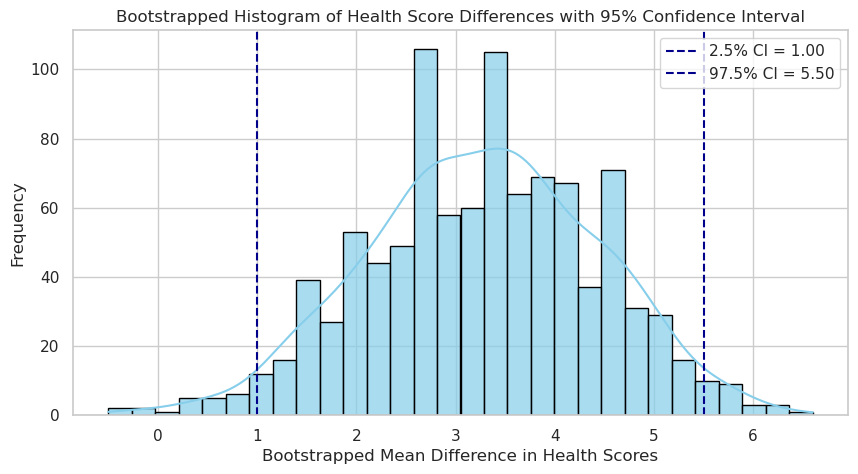

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Creating the data for analysis
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Calculating the difference between final and initial health scores
df['ScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Bootstrapping function
def bootstrap_sample(data, num_samples=1000):
    return np.random.choice(data, size=(num_samples, len(data)), replace=True)

# Extracting the 'ScoreDifference' for bootstrapping
score_diff_data = df['ScoreDifference'].values

# Bootstrapping
num_samples = 1000
bootstrap_samples = bootstrap_sample(score_diff_data, num_samples=num_samples)
bootstrap_means = bootstrap_samples.mean(axis=1)

# Calculating confidence interval (95%)
conf_interval = np.percentile(bootstrap_means, [2.5, 97.5])

# Setting the plot style
plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")

# Plotting the histogram with bootstrapped means
sns.histplot(bootstrap_means, bins=30, kde=True, color="skyblue", edgecolor='black', alpha=0.7)

# Adding confidence interval lines
plt.axvline(conf_interval[0], color='darkblue', linestyle='--', label=f'2.5% CI = {conf_interval[0]:.2f}')
plt.axvline(conf_interval[1], color='darkblue', linestyle='--', label=f'97.5% CI = {conf_interval[1]:.2f}')

# Adding title and labels
plt.title('Bootstrapped Histogram of Health Score Differences with 95% Confidence Interval')
plt.xlabel('Bootstrapped Mean Difference in Health Scores')
plt.ylabel('Frequency')

# Adding legend and showing the plot
plt.legend()
plt.show()


Findings and Discussions:

Conclusion on null hypothesis: (Using the bootstrapped distribution created by ChatGPT)
The above histogram of the bootstrapped distribution shows us the average difference in health scores, and the 95% confidence interval, ranging from 1.00 to 5.50. This interval excludes zero, which means that assume that taking the vaccine significantly improves the health of those that take it. 
Therefore, we reject the null hypothesis of "no effect" and come to the conclusion (with 95% confidence) that the vaccine has caused a significant improvement in health scores, after taking it. 

Further Considerations:
We must take into account the many external factors which may affect the data, such as the age of the patients, their environment/surroundings, eating habits etc. There is also an extremely small sample to choose from (10 people), which means that it may not be an accurate representation of the whole population that took the vaccine, leading to an incorrect conclusion. 

Summary (Of data visualization creation by ChatGPT:
In this session, we worked on visualizing a dataset containing patient information, including age and health scores. We started by creating box plots, histograms, and scatter plots to analyze the initial and final health scores, age distribution, and the relationship between initial and final scores. Each visualization was provided separately to facilitate one-by-one analysis. Then, we proceeded to create a bootstrapped histogram based on the ages in the dataset, adding a 95% confidence interval to understand the variability in the bootstrapped means. The complete Python code for each step was also prepared for use in a Jupyter Notebook, ensuring ease of replication for further analysis.

ChatGPT log: https://chatgpt.com/share/66fe2c4d-7174-800c-8cfb-c727152540fe

9. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

My answer: Yes 